# 2nd order servo model

![diagram](../doc/diagrams/control-servo.png)


In [10]:
import numpy
import matplotlib.pyplot as plt
import LibsControl

#2nd order state space model
#dx = Ax + Bu

#dv   = -1.0/tau*v + amp/tau*u
#dpos = v

tau = 0.35
amp = 7.0

#fill matrices
a = numpy.zeros((2, 2))
b = numpy.zeros((2, 1))

a[0][0] = -1.0/tau
a[0][1] = 0.0
a[1][0] = 1.0
a[1][1] = 0.0

b[0][0] = amp/tau

print(a)
print(b)

[[-2.85714286  0.        ]
 [ 1.          0.        ]]
[[20.]
 [ 0.]]


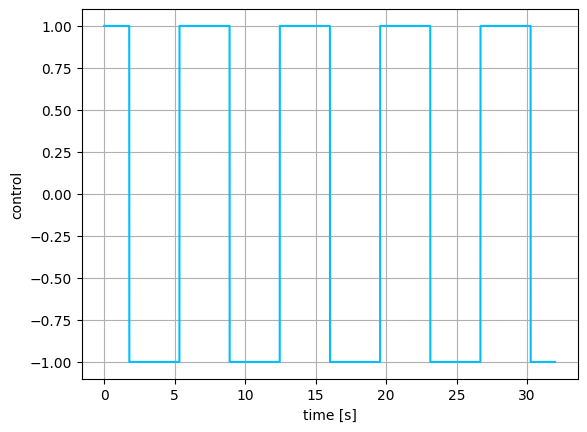

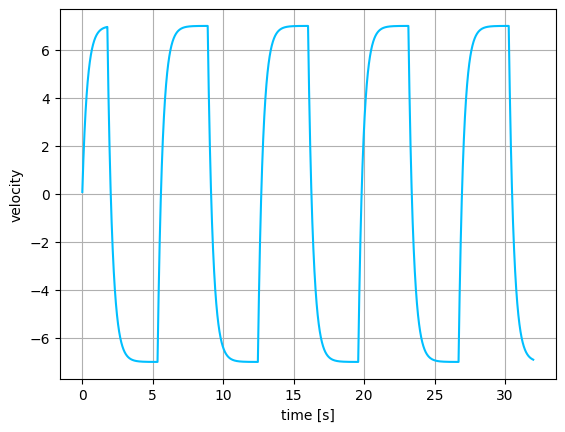

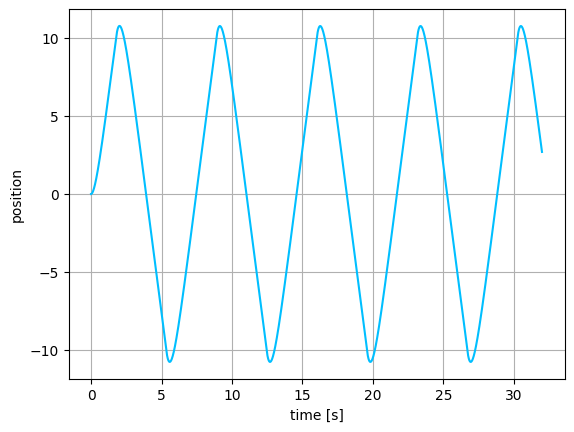

In [11]:
dt          = 1.0/250.0
steps       = 8000
t_result    = numpy.arange(steps)*dt

#initial state
x           = numpy.zeros((2, 1))

#resulted states for ploting
u_result    = numpy.zeros((steps, 1))
x_result    = numpy.zeros((steps, 2))

u_out_max   = 1.0
u_out       = u_out_max
pos_max     = 10.0

for i in range(steps):
    
    if x[1, 0] > pos_max:
        u_out   = -u_out_max
    elif x[1, 0] < -pos_max:
        u_out   = u_out_max
    
   
    u = numpy.ones((1, 1))*u_out

    dx = a@x + b@u
    x  = x   + dx*dt

    u_result[i] = u[:, 0]
    x_result[i] = x[:, 0]

#plot response
plt.clf()
plt.ylabel("control")
plt.xlabel("time [s]")
plt.plot(t_result, u_result[:, 0], color="deepskyblue")
plt.grid()
plt.show()

plt.clf()
plt.ylabel("velocity")
plt.xlabel("time [s]")
plt.plot(t_result, x_result[:, 0], color="deepskyblue")
plt.grid()
plt.show()

plt.clf()
plt.ylabel("position")
plt.xlabel("time [s]")
plt.plot(t_result, x_result[:, 1], color="deepskyblue")
plt.grid()
plt.show()

In [12]:

position = numpy.expand_dims(x_result[:, 1], 1)

#position = position + 1*numpy.random.randn(x_result.shape[0], 1)
position_denoised  = position.copy()


'''
position_denoised = LibsControl.denoising(position_denoised, alpha=10.0)
position_denoised = LibsControl.smoothing(position_denoised, alpha=0.1)


plt.clf()
plt.ylabel("position noised")
plt.xlabel("time [s]")
plt.plot(t_result, position[:, 0], color="deepskyblue", alpha=0.8)
plt.plot(t_result, position_denoised[:, 0], color="red", alpha=0.8)
plt.grid()
plt.show()
'''



a, b     = LibsControl.servo_identification(u_result, position_denoised, dt)

tau = -1.0/a
k   = b*tau


print("a    = ", a)
print("b    = ", b)
print("\n")
print("tau  = ", tau)
print("k    = ", k)


a    =  -2.817407436722542
b    =  19.78192356537634


tau  =  0.35493623924102674
k    =  7.021321555248121
